## Import Libraries..!!

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as skm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Read dataset from csv file..!!

In [2]:
kyp_data = pd.read_csv('kyphosis.csv')
kyp_data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
kyp_data.shape

(81, 4)

In [4]:
kyp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [5]:
kyp_data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Check for Null Values..!!

In [6]:
kyp_data.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
kyp_data.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

## Creating heatmap of Null Values..!!

<AxesSubplot:>

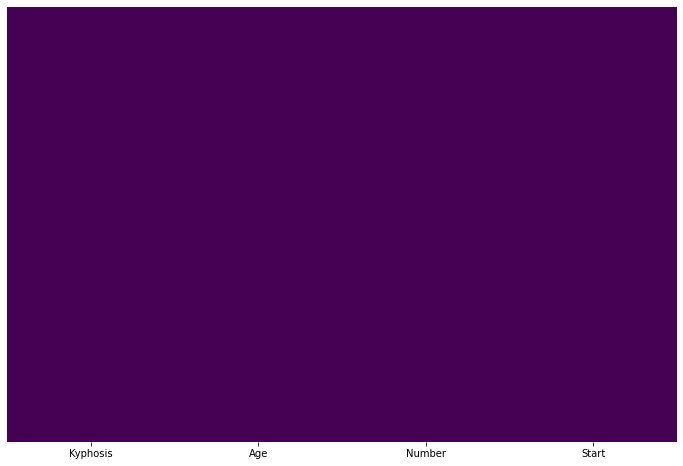

In [8]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(kyp_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

## Now, creating heatmap of our dataset correlation..!!

<AxesSubplot:>

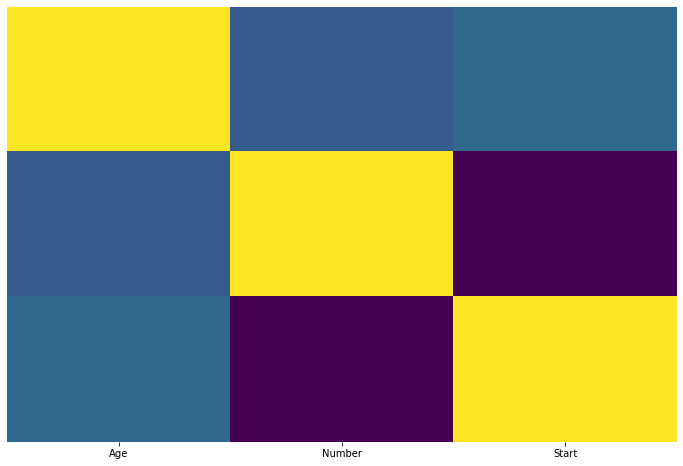

In [9]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(kyp_data.corr(), yticklabels = False, cbar = False, cmap = 'viridis')

## Now, apply EDA..!!

## Pairplot..!!

<Figure size 864x576 with 0 Axes>

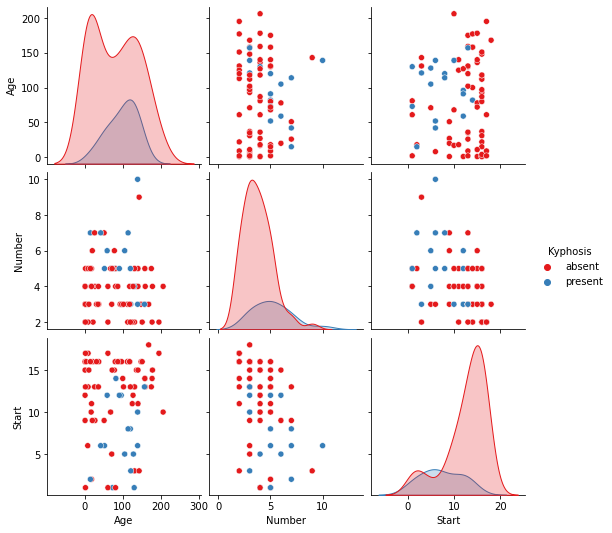

In [10]:
fig = plt.figure(figsize = (12, 8))
sns.pairplot(kyp_data, hue = 'Kyphosis', palette = 'Set1')

## Train Test Split..!!
### Let's split up the data into a training set and a test set..!!

In [11]:
x = kyp_data.drop('Kyphosis', axis = 1)
y = kyp_data['Kyphosis']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 45)

## Creating a Decision Tree Model..!!

In [13]:
tree_model = DecisionTreeClassifier()

## Now, train our model..!!

In [14]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

## Now, predict our model..!!

In [15]:
y_pred = tree_model.predict(x_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.77      0.83      0.80        12
     present       0.50      0.40      0.44         5

    accuracy                           0.71        17
   macro avg       0.63      0.62      0.62        17
weighted avg       0.69      0.71      0.70        17



In [17]:
print(confusion_matrix(y_test, y_pred))

[[10  2]
 [ 3  2]]


In [39]:
tree_accuracy = tree_model.score(x_test, y_test)
print("Decision Tree Model Accuracy:", tree_accuracy * 100, "%")

Decision Tree Model Accuracy: 70.58823529411765 %


## Tree Visualization..!!

In [24]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [25]:
features = list(kyp_data.columns[1:])
features

['Age', 'Number', 'Start']

In [29]:
dot_data = StringIO()

In [30]:
export_graphviz(tree_model, out_file = dot_data, feature_names = features, filled = True, rounded = True)

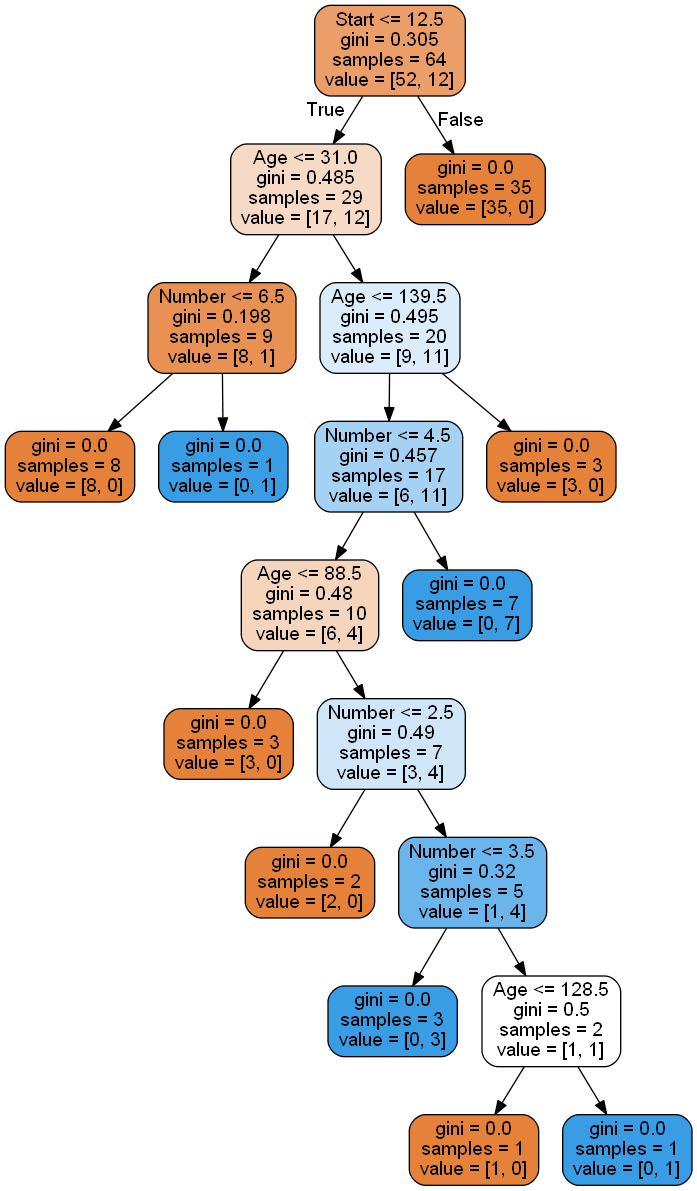

In [31]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forest..!!

### Now let's compare the decision tree model to a random forest..!!

In [32]:
from sklearn.ensemble import RandomForestClassifier

## Creating Random Forest Model..!!

In [33]:
random_model = RandomForestClassifier(n_estimators = 100)

## Now, train our model..!!

In [34]:
random_model.fit(x_train, y_train)

RandomForestClassifier()

## Now, predict our model..!!

In [35]:
rand_y_pred = random_model.predict(x_test)

In [36]:
print(classification_report(y_test, rand_y_pred))

              precision    recall  f1-score   support

      absent       0.77      0.83      0.80        12
     present       0.50      0.40      0.44         5

    accuracy                           0.71        17
   macro avg       0.63      0.62      0.62        17
weighted avg       0.69      0.71      0.70        17



In [37]:
print(confusion_matrix(y_test, rand_y_pred))

[[10  2]
 [ 3  2]]


In [40]:
forest_accuracy = random_model.score(x_test, y_test)
print("Random Forest Model Accuracy:", forest_accuracy * 100, "%")

Random Forest Model Accuracy: 70.58823529411765 %


## Scatter plot on decision tree model..!!

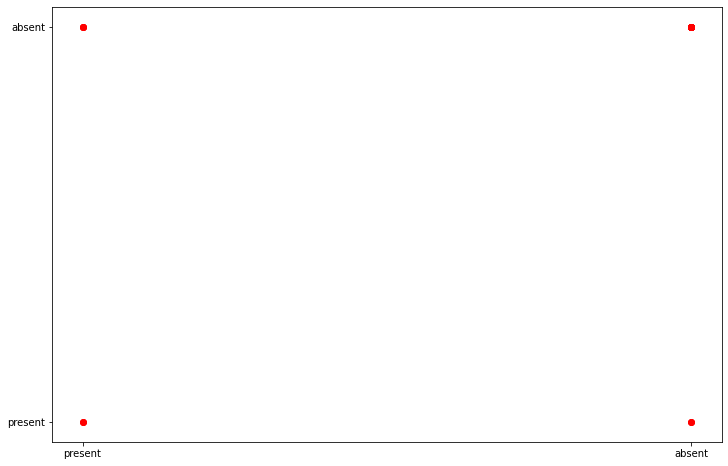

In [42]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(y_test, y_pred, color = 'red')
plt.show()

## Scatter plot on random forest model..!!

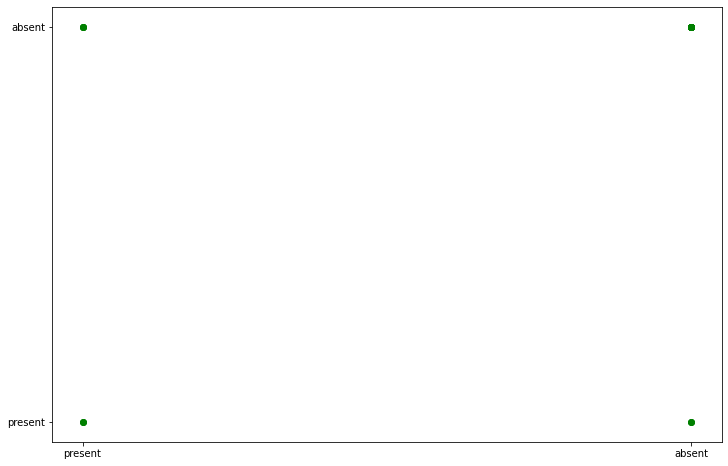

In [43]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(y_test, rand_y_pred, color = 'green')
plt.show()

## Plotting training data..!!

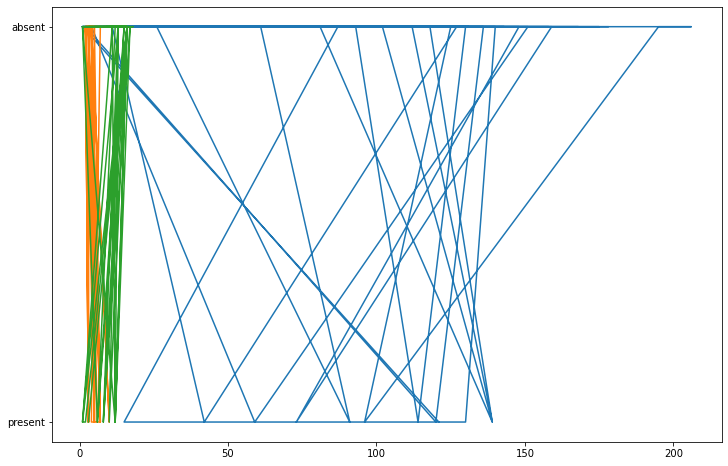

In [48]:
fig = plt.figure(figsize = (12, 8))
plt.plot(x_train, y_train)

## Accuracy of both models..!!

In [49]:
print("Decision Tree Model Accuracy:", tree_accuracy * 100, "%")
print("Random Forest Model Accuracy:", forest_accuracy * 100, "%")

Decision Tree Model Accuracy: 70.58823529411765 %
Random Forest Model Accuracy: 70.58823529411765 %


# THE END..!!